*Brian Blaylock*  
*September 18, 2018*

# HRRR Root-mean-square-differences (RMSD)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')

from BB_GOES.get_ABI import get_GOES_truecolor, file_nearest
from BB_GOES.get_GLM import get_GLM_files_for_ABI, accumulate_GLM
from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_HRRR.HRRR_RMSD import RMSD, RMSD_range
from BB_maps.my_basemap import draw_HRRR_map
from BB_cmap.NWS_standard_cmap import cm_wind, cm_temp, cm_dpt
from BB_cmap.reflectivity_cmap import reflect_ncdc

In [2]:
m = draw_HRRR_map()

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [13]:
sDATE = datetime(2018, 5, 1)
eDATE = datetime(2018, 5, 5)
HOURS = range(24)

variable = 'TMP:2 m'

In [14]:
period_RMSD = RMSD_range(sDATE, eDATE, variable, HOURS=HOURS, FORECASTS=range(5))

2018-05-01 07:00:00 (5, 1059, 1799)
2018-05-01 03:00:00 (5, 1059, 1799)
2018-05-01 08:00:00 (5, 1059, 1799)
2018-05-01 06:00:00 (5, 1059, 1799)
2018-05-01 05:00:00 (5, 1059, 1799)
2018-05-01 02:00:00 (5, 1059, 1799)
2018-05-01 10:00:00 (5, 1059, 1799)
2018-05-01 11:00:00 (5, 1059, 1799)
2018-05-01 04:00:00 (5, 1059, 1799)
2018-05-01 09:00:00 (5, 1059, 1799)
2018-05-01 21:00:00 (5, 1059, 1799)
2018-05-01 18:00:00 (5, 1059, 1799)
2018-05-01 00:00:00 (5, 1059, 1799)
2018-05-01 23:00:00 (5, 1059, 1799)
2018-05-01 01:00:00 (5, 1059, 1799)
2018-05-01 13:00:00 (5, 1059, 1799)
2018-05-01 12:00:00 (5, 1059, 1799)
2018-05-01 16:00:00 (5, 1059, 1799)
2018-05-01 19:00:00 (5, 1059, 1799)
2018-05-01 15:00:00 (5, 1059, 1799)
2018-05-01 17:00:00 (5, 1059, 1799)
2018-05-01 20:00:00 (5, 1059, 1799)
2018-05-01 14:00:00 (5, 1059, 1799)
2018-05-01 22:00:00 (5, 1059, 1799)
2018-05-02 00:00:00 (5, 1059, 1799)
2018-05-02 03:00:00 (5, 1059, 1799)
2018-05-02 04:00:00 (5, 1059, 1799)
2018-05-02 02:00:00 (5, 1059

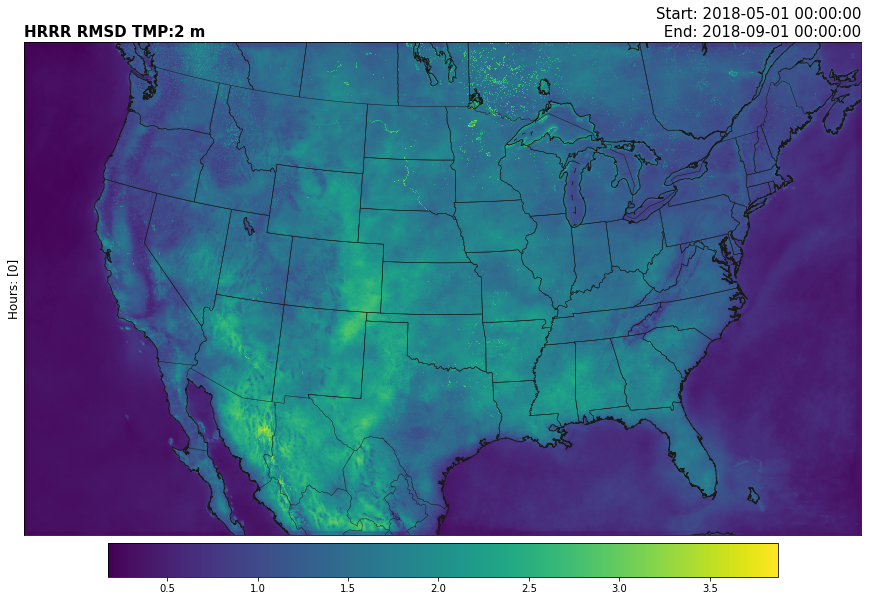

In [48]:
m.pcolormesh(period_RMSD['lon'], period_RMSD['lat'], period_RMSD['RMSD'], latlon=True)
plt.colorbar(orientation='horizontal', shrink=.8, pad=.01)

m.drawcoastlines(color='0.1')
m.drawcountries(color='0.1')
m.drawstates(color='0.1')

plt.title('HRRR RMSD %s' % (variable), loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE, eDATE), loc='right')
plt.ylabel('Hours: %s' % HOURS)

plt.savefig('figs/HRRR_RMSD-%s_hours-%s' % (variable.replace(':', '-').replace(' ', '-'), '-'.join(str(x) for x in HOURS)))

In [41]:
m = draw_HRRR_map(area_thresh=5000)

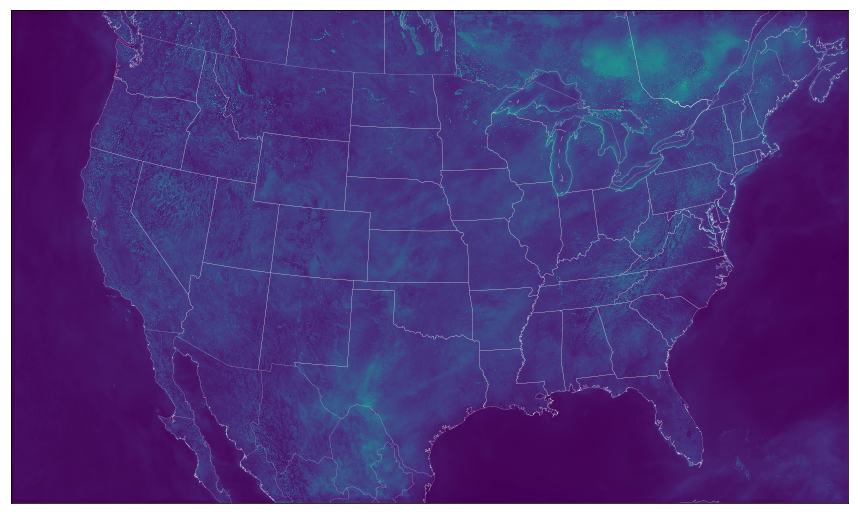

In [47]:
m.pcolormesh(period_RMSD['lon'], period_RMSD['lat'], period_RMSD['RMSD'], latlon=True)
m.drawcoastlines(linewidth=.15, color='w')
m.drawcountries(linewidth=.15, color='w')
m.drawstates(linewidth=.15, color='w')